# Get vowel outliers

In [1]:
import numpy as np
import pandas as pd
import pyarrow
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load in FormantPath data (post-normalization, before median grouping)

In [2]:
final_fmtdf = pd.read_feather('./fpath_filtered_w-norm_04-09-25.ft')
final_fmtdf

F1_norm  F2_norm  F3_norm words phones_short  spk_num   age  \
0          0.352    1.613    2.109   day           EY        1  21.0   
1          0.356    1.638    2.116   day           EY        1  21.0   
2          0.361    1.649    2.098   day           EY        1  21.0   
3          0.370    1.650    2.118   day           EY        1  21.0   
4          0.369    1.654    2.100   day           EY        1  21.0   
...          ...      ...      ...   ...          ...      ...   ...   
1080561    0.426    0.879    2.335   non           AA        2  26.0   
1080562    0.376    0.864    2.331   non           AA        2  26.0   
1080563    0.429    0.798    2.287   non           AA        2  26.0   
1080564    0.423    0.832    2.279   non           AA        2  26.0   
1080565    0.380    0.836    2.303   non           AA        2  26.0   

             gender gender_crude  gender_normative  ...  prev_back  nxt  \
0        non-binary   non-binary               5.0  ...       None  IH1   
1        non-binary   non-binary               5.0  ...       None  IH1   
2        non-binary   non-binary               5.0  ...       None  IH1   
3        non-binary   non-binary               5.0  ...       None  IH1   
4        non-binary   non-binary               5.0  ...       None  IH1   
...             ...          ...               ...  ...        ...  ...   
1080561    cis male    masculine               4.0  ...       None    N   
1080562    cis male    masculine               4.0  ...       None    N   
1080563    cis male    masculine               4.0  ...       None    N   
1080564    cis male    masculine               4.0  ...       None    N   
1080565    cis male    masculine               4.0  ...       None    N   

        nxt_height nxt_back        t1        t2          recording  \
0             high    front    10.579    10.779  S01_interview.wav   
1             high    front    10.579    10.779  S01_interview.wav   
2             high    front    10.579    10.779  S01_interview.wav   
3             high    front    10.579    10.779  S01_interview.wav   
4             high    front    10.579    10.779  S01_interview.wav   
...            ...      ...       ...       ...                ...   
1080561       None     None  1671.510  1671.620  S48_interview.wav   
1080562       None     None  1671.510  1671.620  S48_interview.wav   
1080563       None     None  1671.510  1671.620  S48_interview.wav   
1080564       None     None  1671.510  1671.620  S48_interview.wav   
1080565       None     None  1671.510  1671.620  S48_interview.wav   

             time(s)      F1(Hz)       F2(Hz)  
0          10.582000  491.290009  2253.395020  
1          10.587000  498.054993  2288.993896  
2          10.592000  504.933990  2303.955078  
3          10.597000  516.494995  2305.099121  
4          10.602000  515.312012  2311.060059  
...              ...         ...          ...  
1080561  1671.596802  526.960999  1088.045044  
1080562  1671.601807  465.359009  1069.746948  
1080563  1671.606812  531.426025   987.765991  
1080564  1671.611816  523.494019  1029.793945  
1080565  1671.616821  470.587006  1035.404053  

[1032065 rows x 54 columns]

## Group using by-token medians

In [3]:
medians = final_fmtdf.groupby(['speaker', 'recording', 't1', 'phones_short']).agg({'F1(Hz)': 'median', 'F2(Hz)': 'median'}).reset_index()
medians.head()

speaker          recording      t1 phones_short      F1(Hz)       F2(Hz)
0     S01  S01_interview.wav  10.579           EY  541.286987  2330.753906
1     S01  S01_interview.wav  10.979           IH  626.039490  2093.340332
2     S01  S01_interview.wav  11.669           UH  626.252502  1887.722534
3     S01  S01_interview.wav  12.319           IH  620.387024  2076.330078
4     S01  S01_interview.wav  13.539           AH  465.351013  1858.627441

In [4]:
medians.shape

(42606, 6)

## By-speaker plots, showing outliers

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


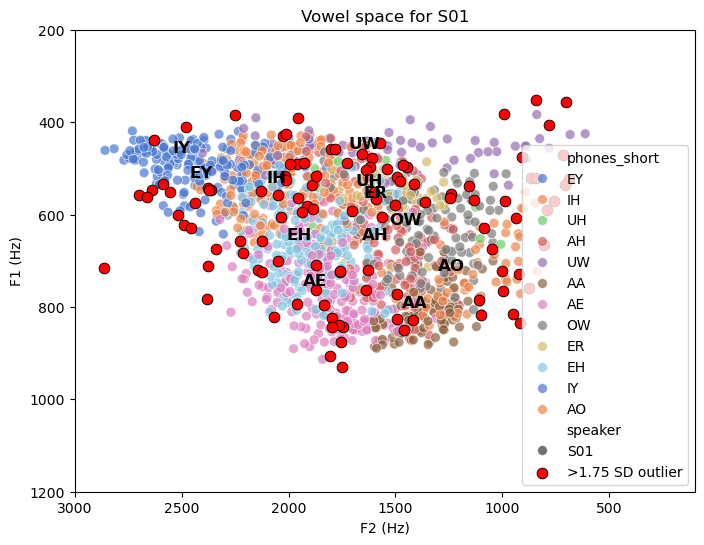

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


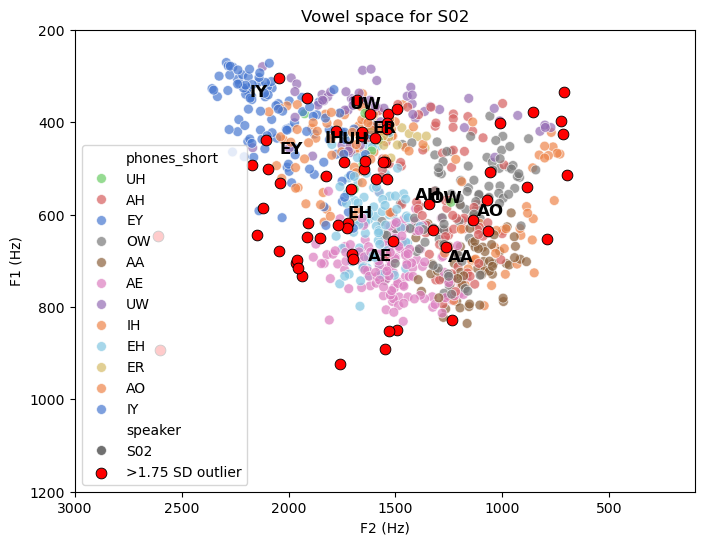

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


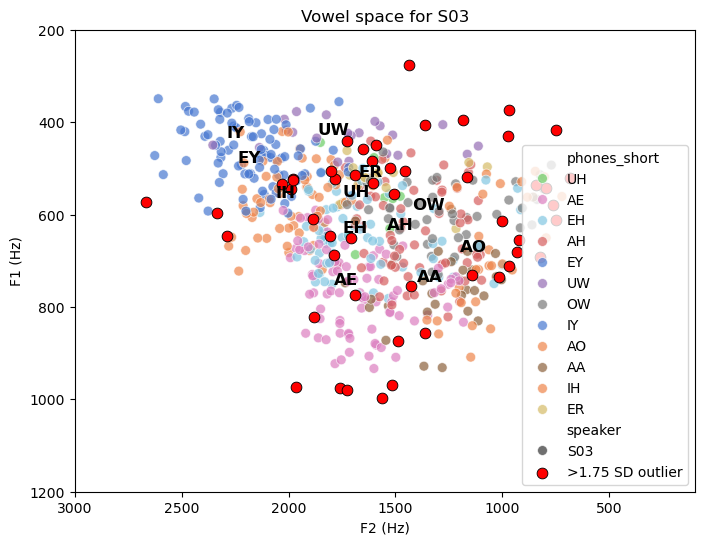

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


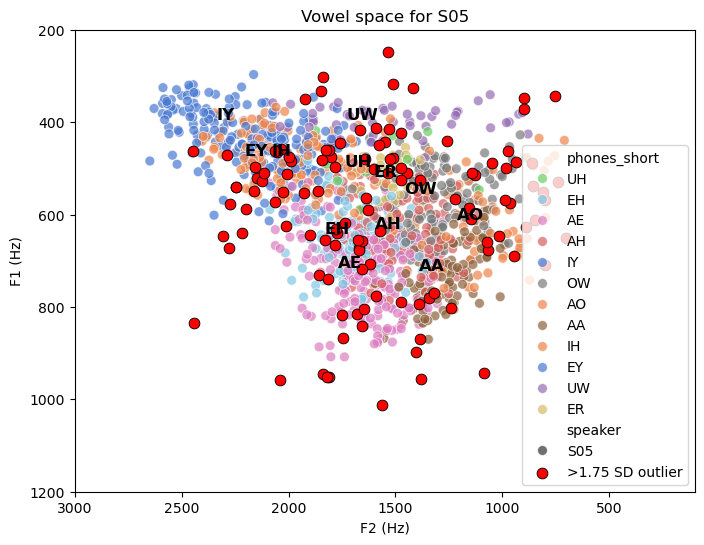

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


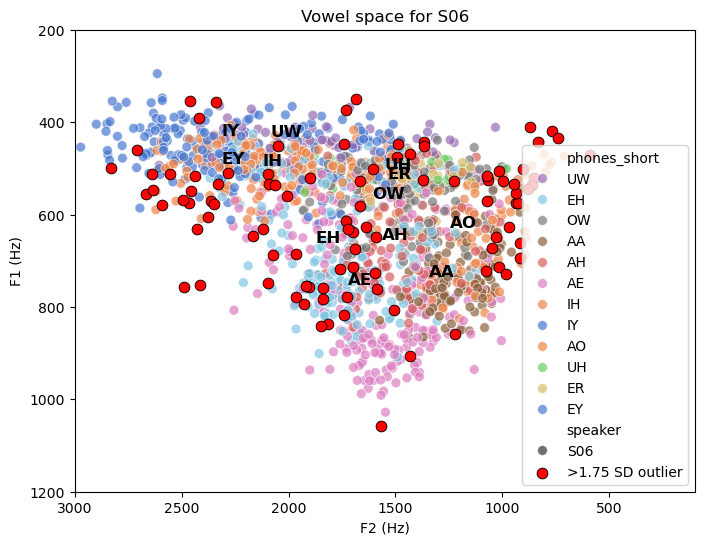

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


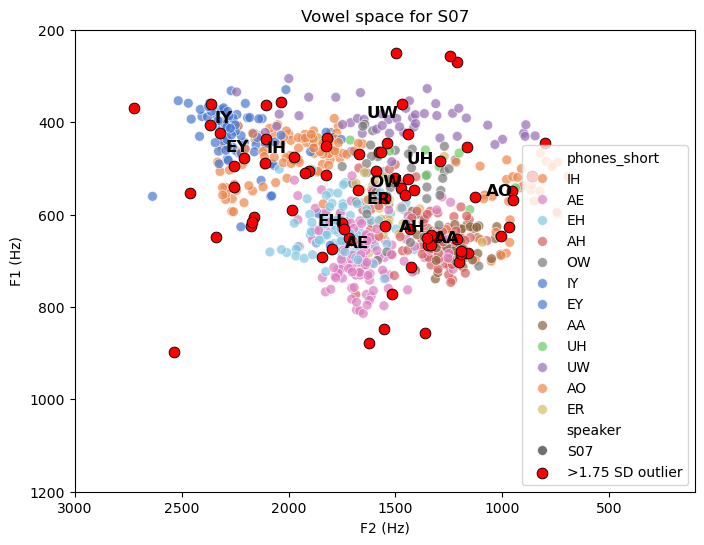

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


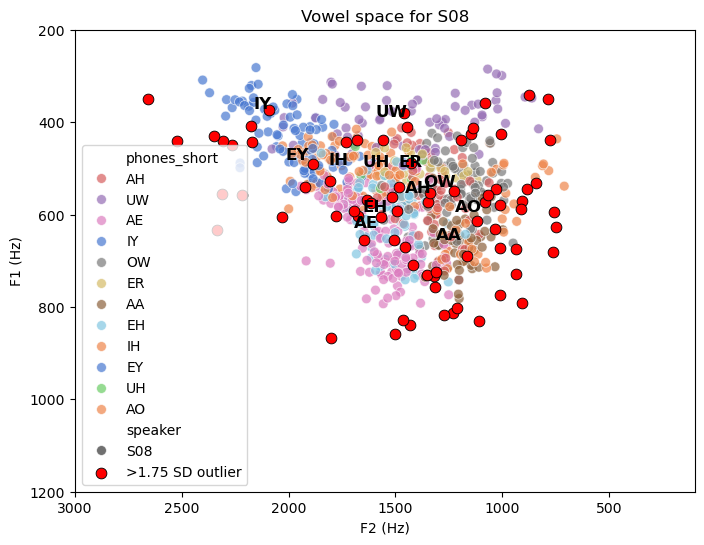

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


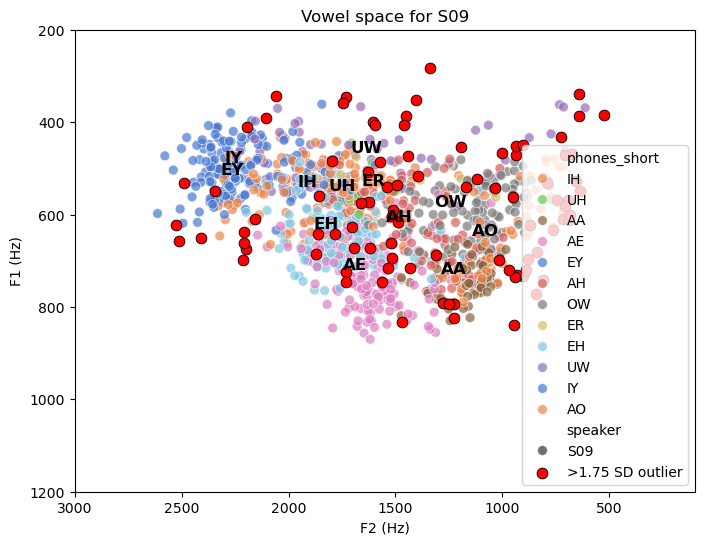

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


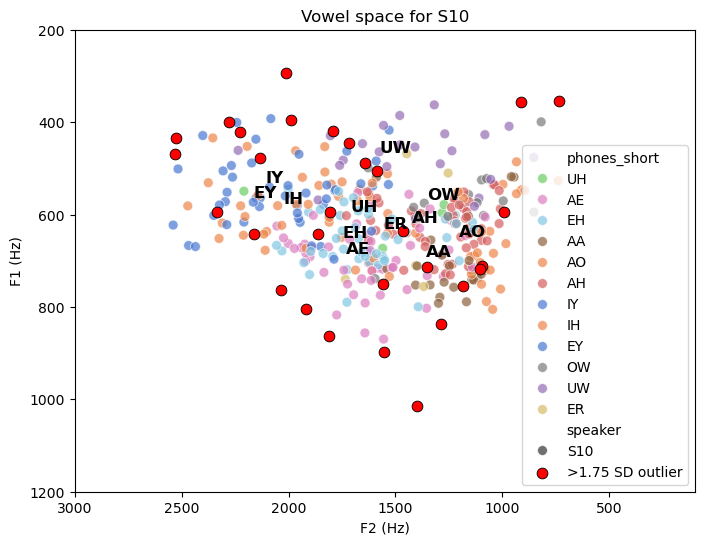

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


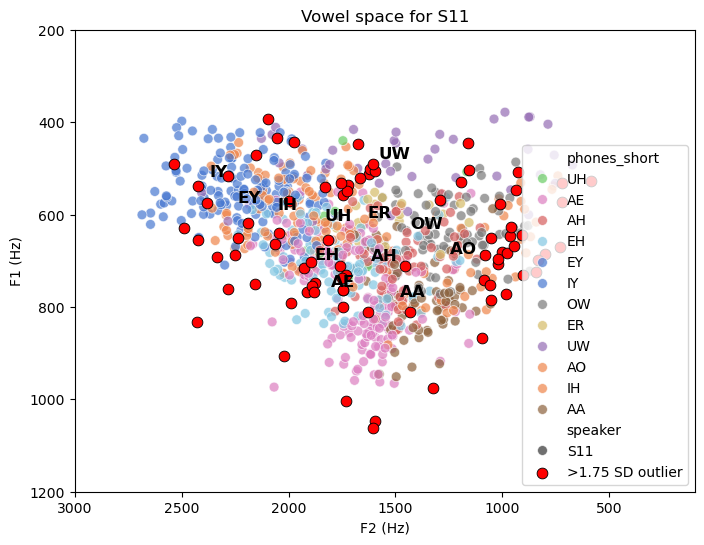

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


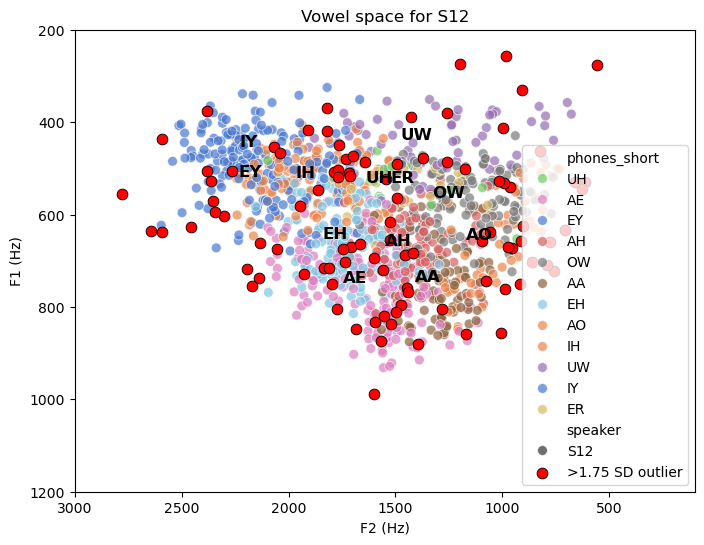

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


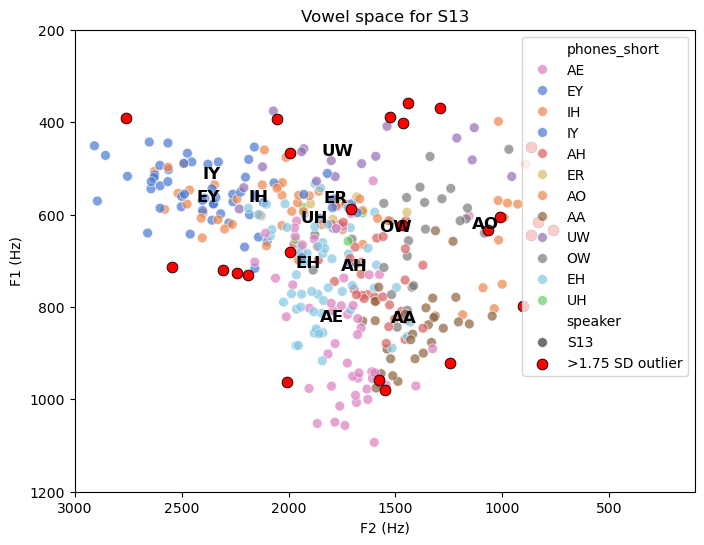

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


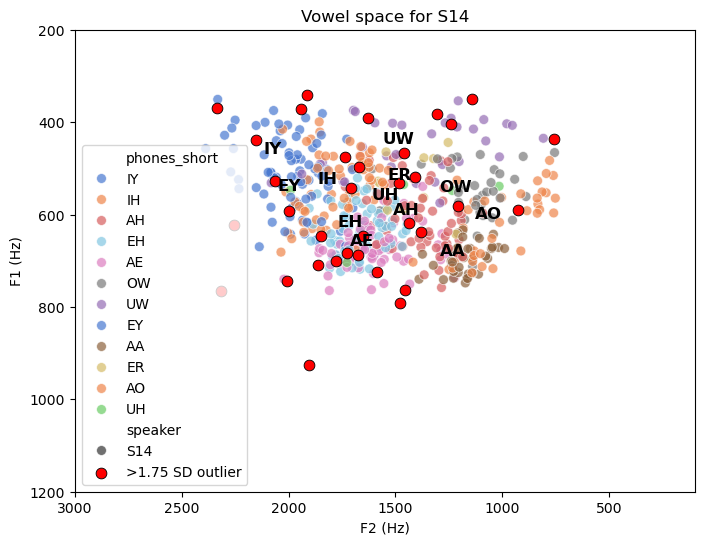

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


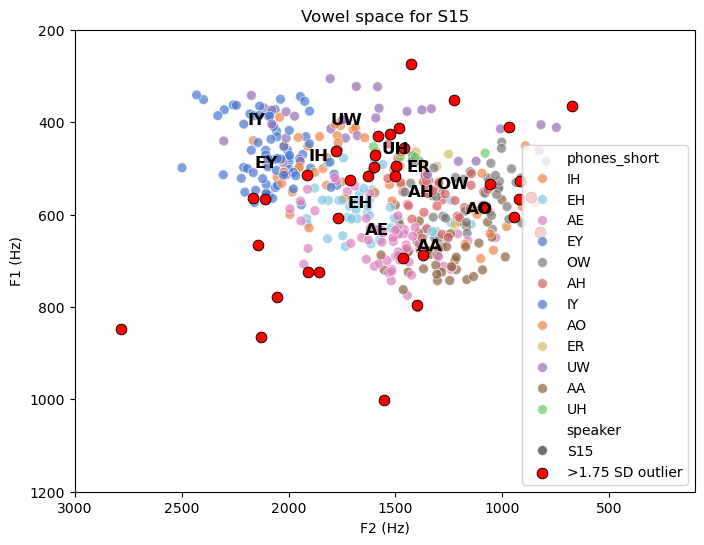

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


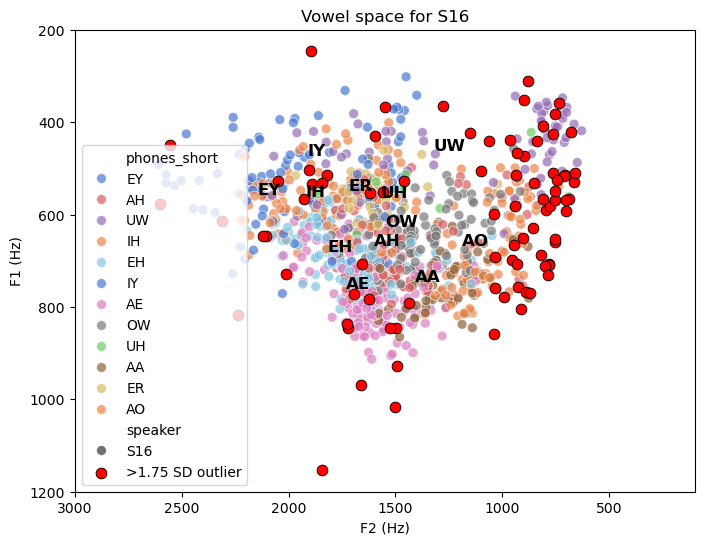

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


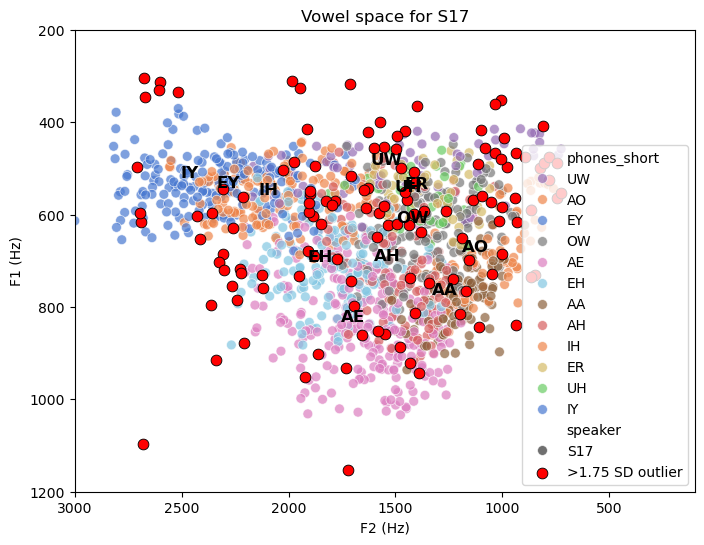

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


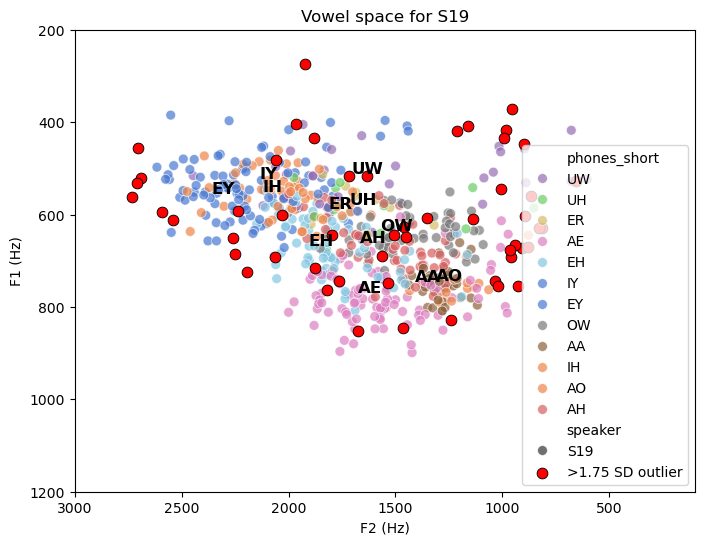

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


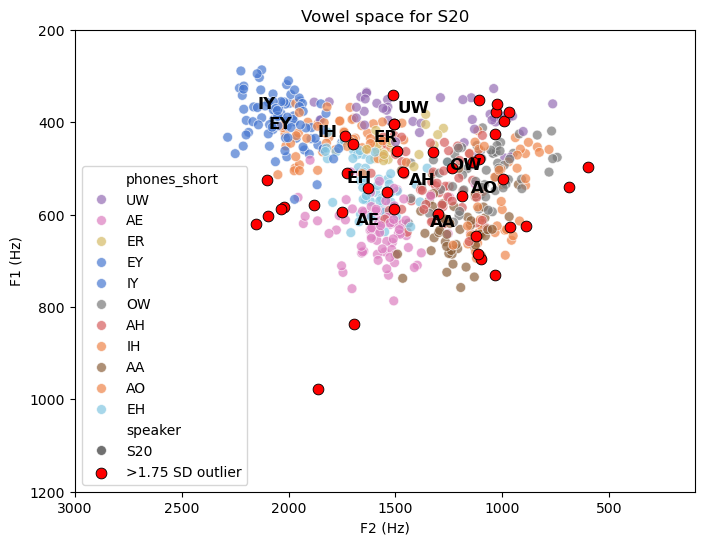

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


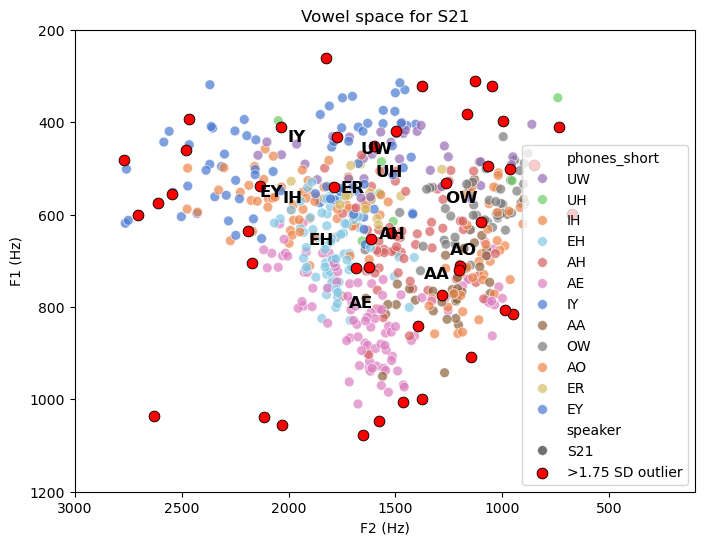

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


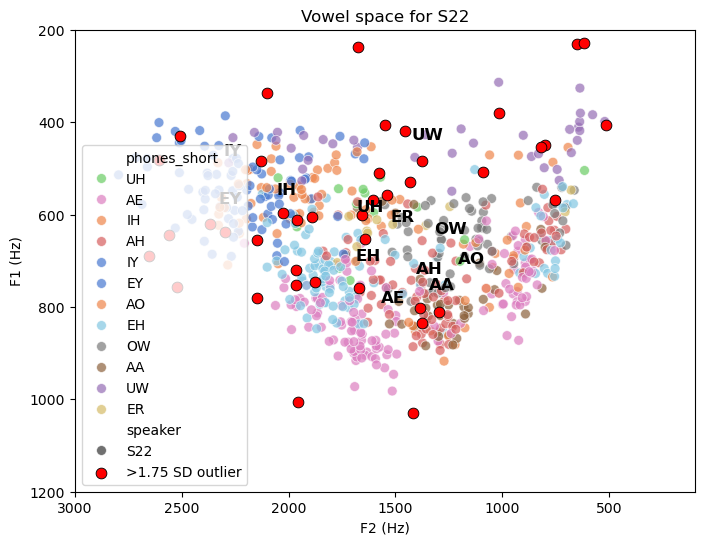

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


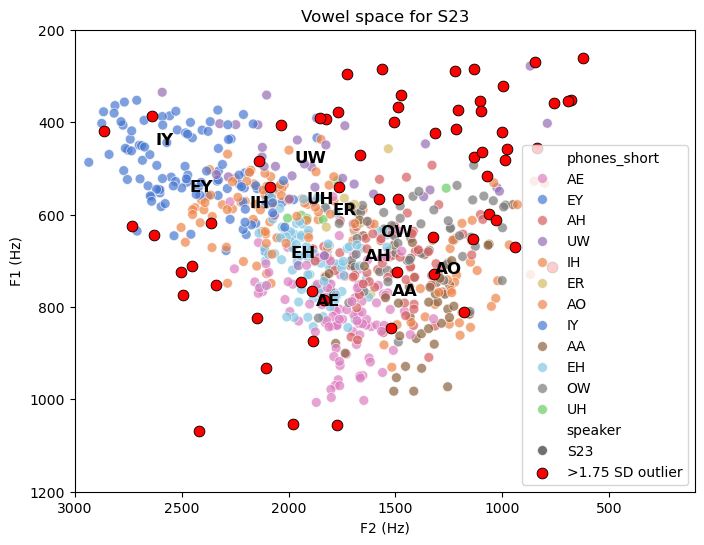

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


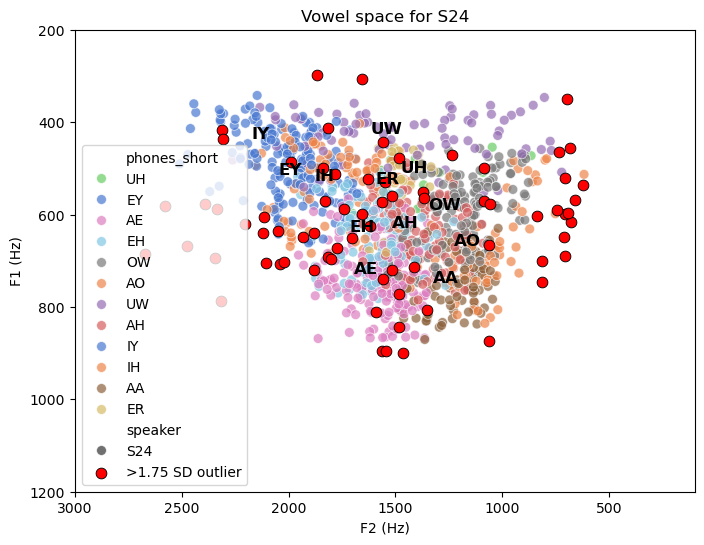

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


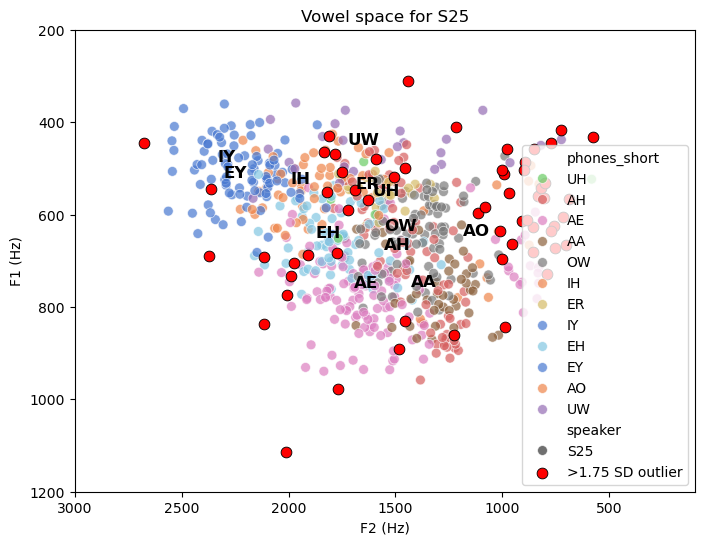

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


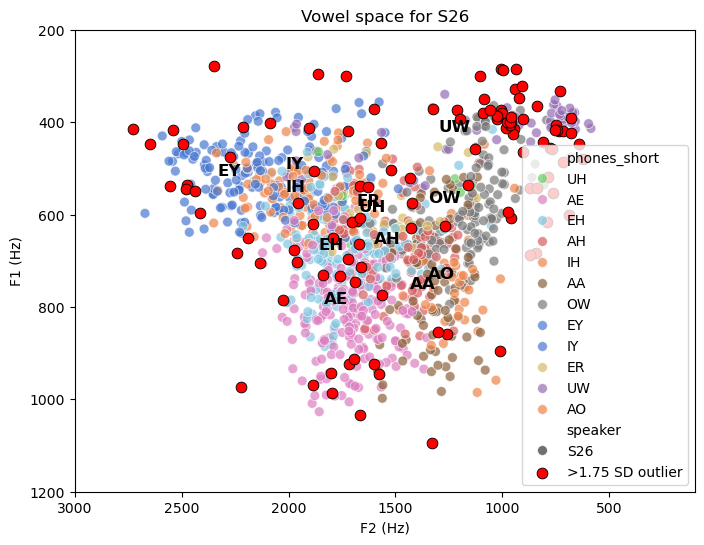

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


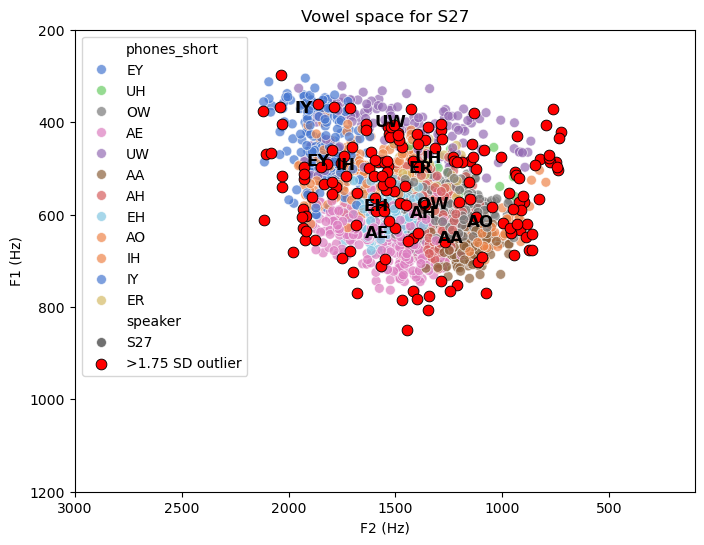

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


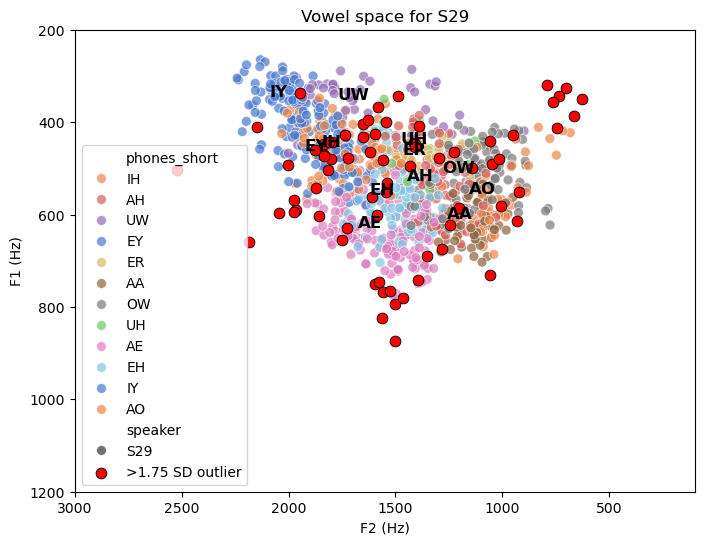

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


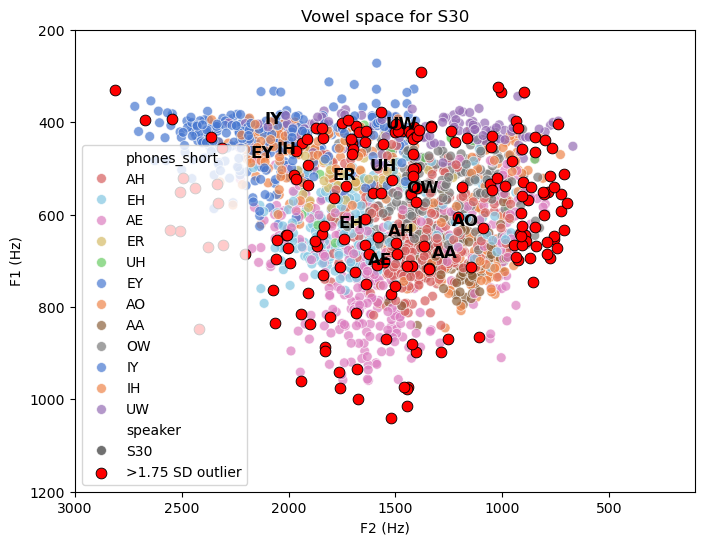

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


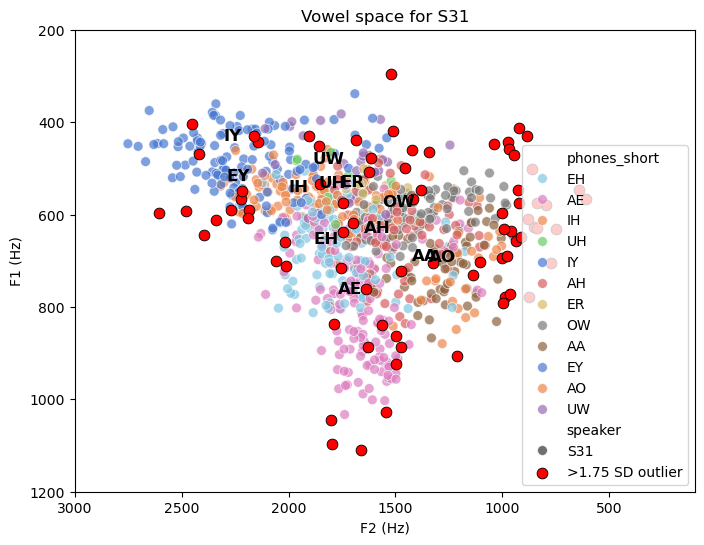

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


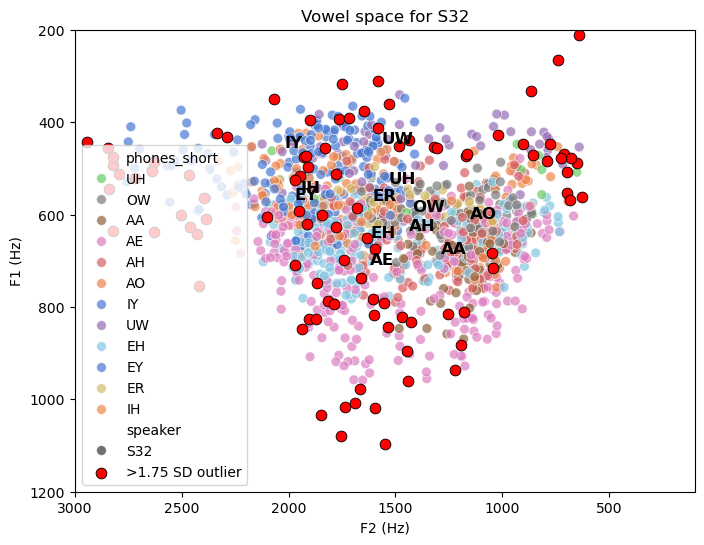

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


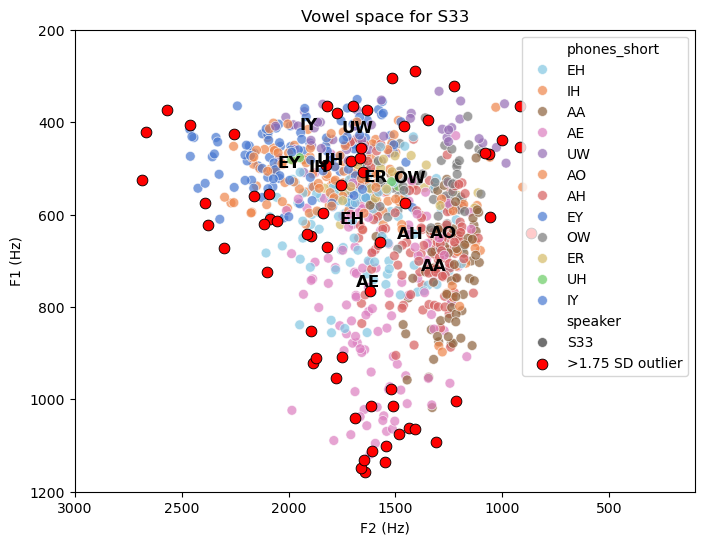

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


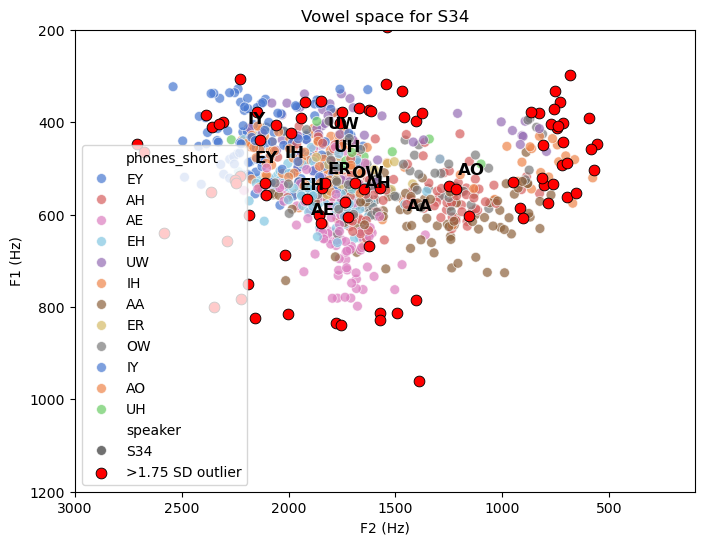

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


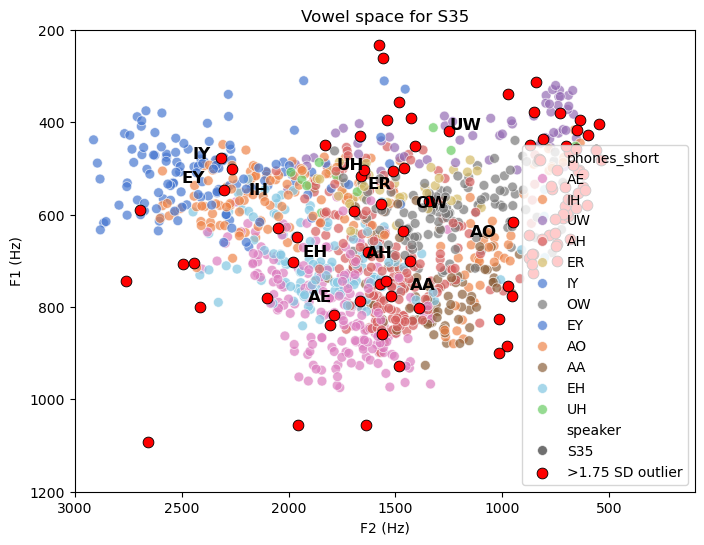

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


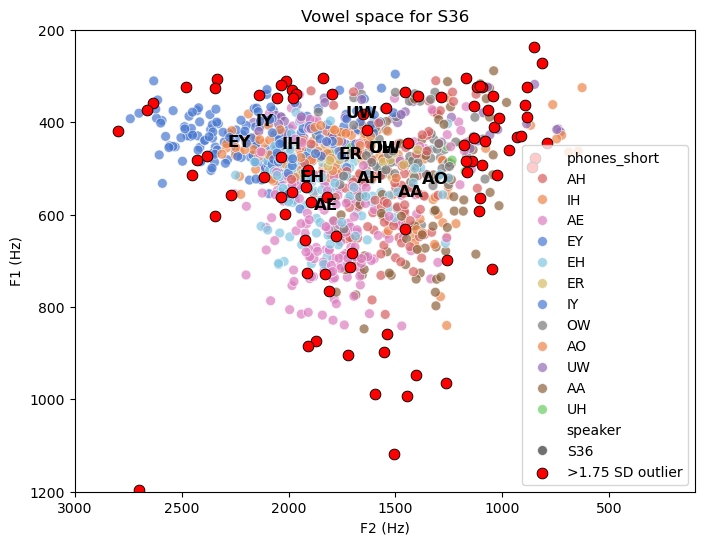

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


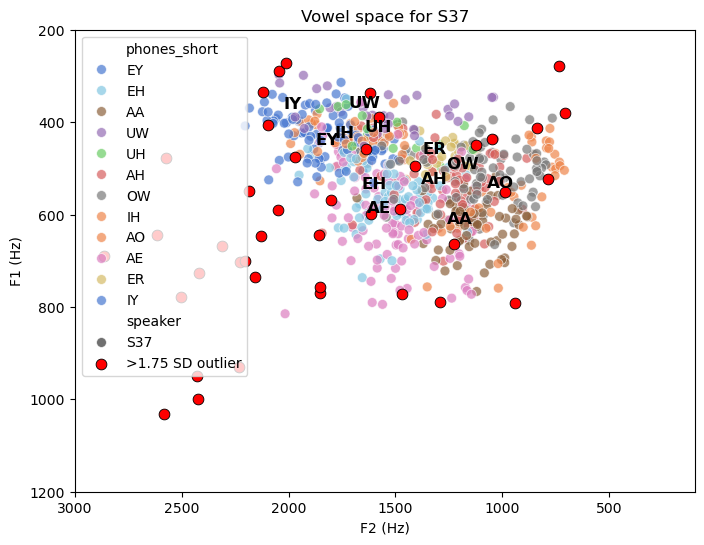

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


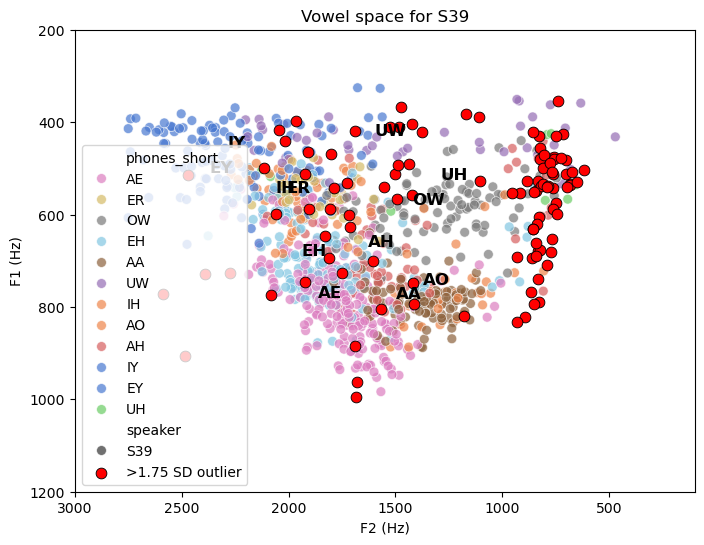

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


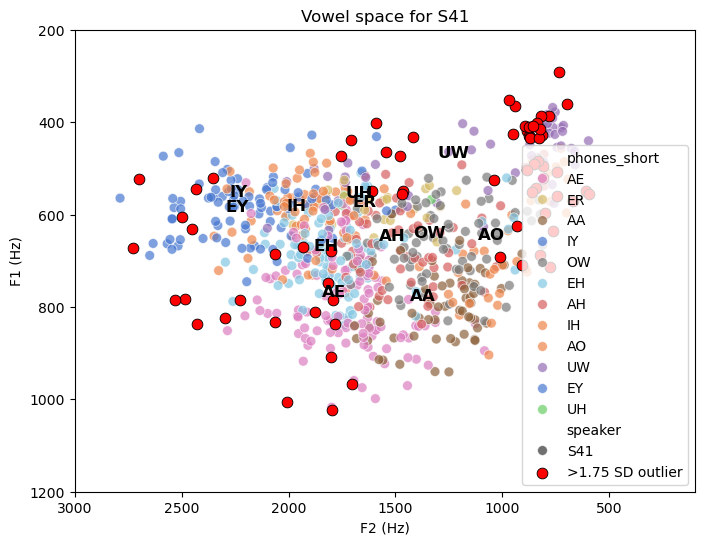

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


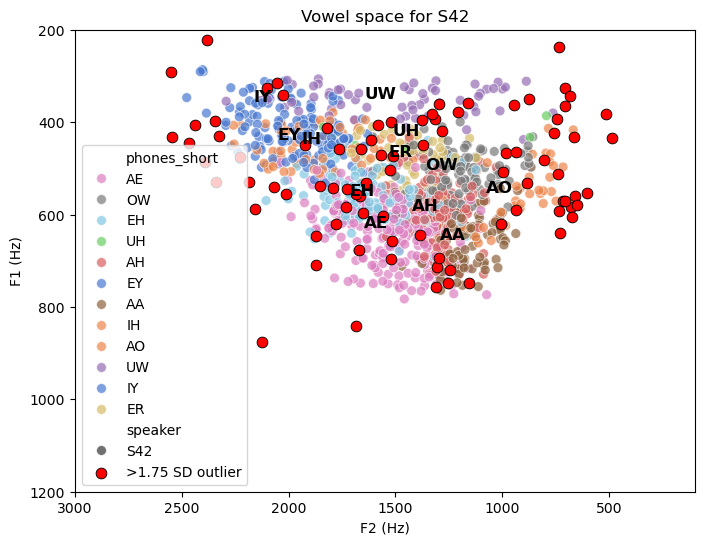

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


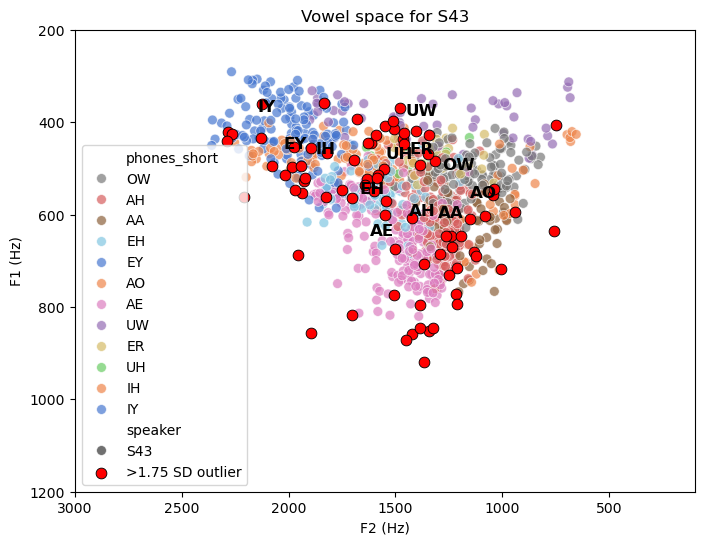

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


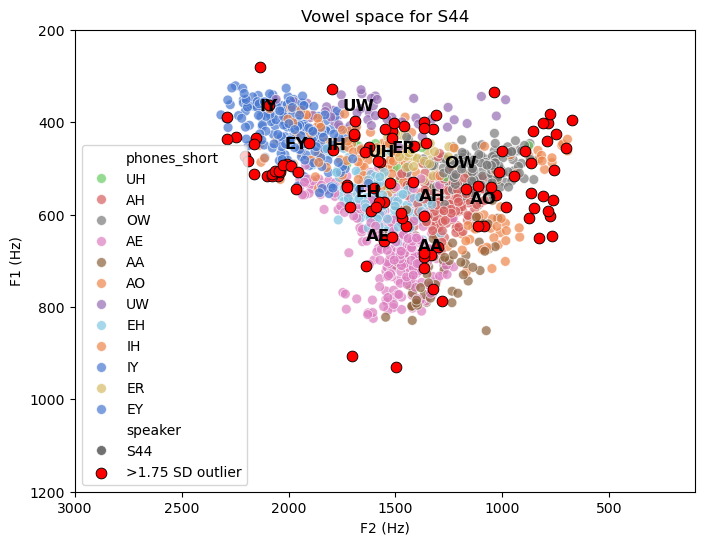

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


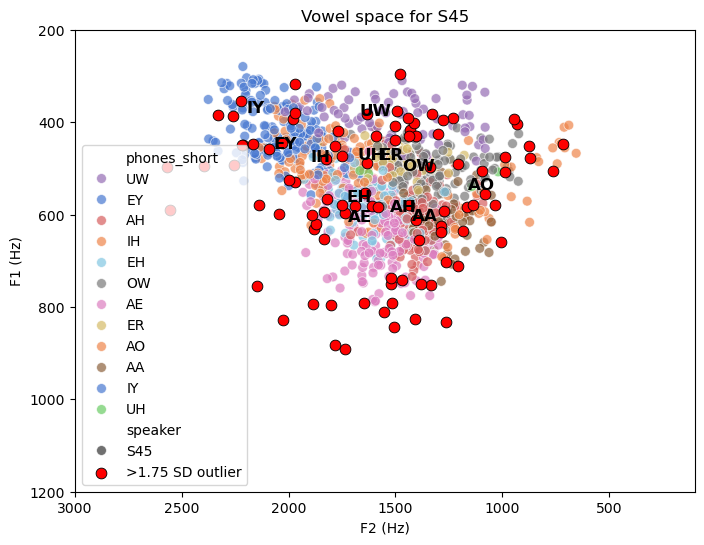

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


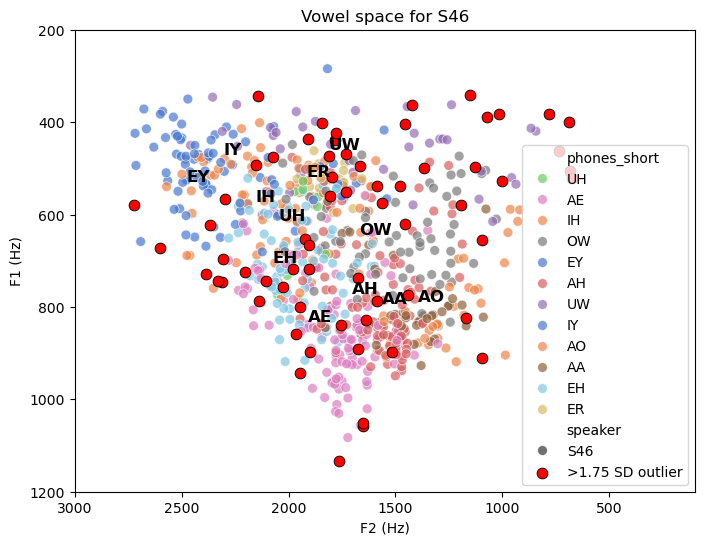

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


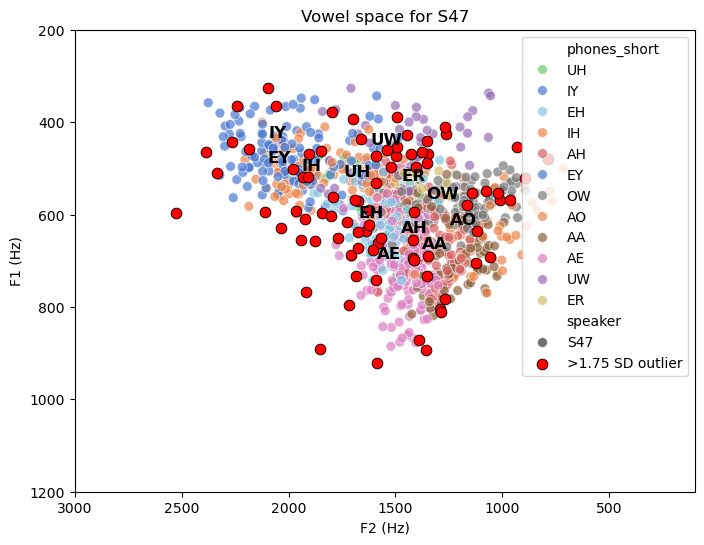

Index(['speaker', 'recording', 't1', 'phones_short', 'F1(Hz)', 'F2(Hz)',
       'F1(Hz)_mean', 'F1(Hz)_std', 'F2(Hz)_mean', 'F2(Hz)_std'],
      dtype='object')


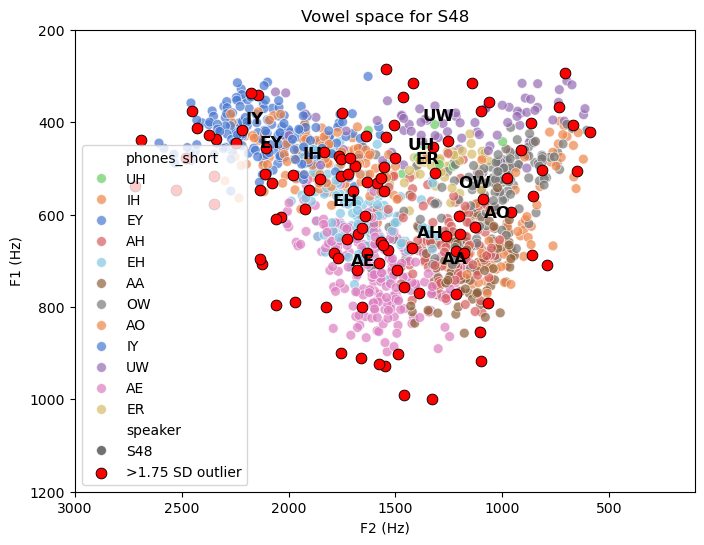

In [5]:
unique_phones = medians['phones_short'].unique()
palette = dict(zip(unique_phones, sns.color_palette("muted", len(unique_phones))))

unique_speakers = medians['speaker'].unique()

outliers_list = []

for speaker in unique_speakers:
    speaker_data = medians[medians['speaker'] == speaker].copy()
    
    # 1) compute phone-specific stats
    stats = speaker_data.groupby('phones_short')[['F1(Hz)', 'F2(Hz)']] \
                        .agg(['mean','std'])
    # flatten MultiIndex
    stats.columns = ['_'.join(col) for col in stats.columns]  # ['F1_mean','F1_std',...]

    # merge them back onto speaker_data
    speaker_data = speaker_data.merge(
        stats, left_on='phones_short', right_index=True, suffixes=('_x', '')
    )
    speaker_data.drop(speaker_data.filter(regex='_x$').columns, axis=1, inplace=True)
    print(speaker_data.columns)
    
    # 2) flag outliers: >2 SD on F1 OR F2
    is_outlier = (
        (speaker_data['F1(Hz)'] - speaker_data['F1(Hz)_mean']).abs() > 2 * speaker_data['F1(Hz)_std']
    ) | (
        (speaker_data['F2(Hz)'] - speaker_data['F2(Hz)_mean']).abs() > 2 * speaker_data['F2(Hz)_std']
    )
    out = speaker_data[is_outlier]
    inn = speaker_data[~is_outlier]
    
    outliers_list.append(out)
    
    # 3) plot valid data points
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x='F2(Hz)',
        y='F1(Hz)',
        hue='phones_short',
        style='speaker',
        data=inn,
        s=50,
        alpha=0.7,
        palette=palette
    )
    # 4) overlay outliers in red
    sns.scatterplot(
        x='F2(Hz)',
        y='F1(Hz)',
        data=out,
        color='red',
        marker='o',
        s=60,
        edgecolor='black',
        label='>1.75 SD outlier'
    )
    
    plt.xlabel('F2 (Hz)')
    plt.ylabel('F1 (Hz)')
    plt.xlim(100, 3000)
    plt.ylim(200, 1200)
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    
    means = inn.groupby('phones_short')[['F1(Hz)', 'F2(Hz)']].mean().reset_index()
    for _, row in means.iterrows():
        plt.text(
            row['F2(Hz)'], row['F1(Hz)'], row['phones_short'],
            fontsize=12, ha='right', va='bottom', fontweight='bold'
        )
    
    plt.legend()
    plt.title(f'Vowel space for {speaker}')
    plt.savefig(f'vowel_space_{speaker}.png', dpi=300, bbox_inches='tight')
    plt.show()
    
outliers_df = pd.concat(outliers_list, ignore_index=True)

In [6]:
pd.set_option('display.max_rows', None)
outliers_df.groupby(['speaker', 'phones_short']).agg({'F1(Hz)': 'count', 'F2(Hz)': 'count'})

F1(Hz)  F2(Hz)
speaker phones_short                
S01     AA                11      11
        AE                21      21
        AH                 5       5
        AO                 5       5
        EH                11      11
        ER                 4       4
        EY                 8       8
        IH                16      16
        IY                10      10
        OW                10      10
        UH                 1       1
        UW                 9       9
S02     AA                 3       3
        AE                19      19
        AH                 3       3
        AO                 1       1
        EH                 8       8
        ER                 2       2
        EY                 4       4
        IH                 6       6
        IY                 6       6
        OW                 5       5
        UH                 1       1
        UW                 5       5
S03     AA                 4       4
        AE                12      12
        AH                 7       7
        AO                 2       2
        EH                 8       8
        ER                 3       3
        EY                 3       3
        IH                 3       3
        IY                 3       3
        OW                 3       3
        UW                 3       3
S05     AA                14      14
        AE                19      19
        AH                13      13
        AO                 5       5
        EH                14      14
        ER                 7       7
        EY                 9       9
        IH                 8       8
        IY                11      11
        OW                12      12
        UW                 6       6
S06     AA                 9       9
        AE                20      20
        AH                 9       9
        AO                 6       6
        EH                10      10
        ER                 2       2
        EY                 5       5
        IH                12      12
        IY                 4       4
        OW                 9       9
        UH                 1       1
        UW                10      10
S07     AA                 2       2
        AE                16      16
        AH                 9       9
        AO                 2       2
        EH                10      10
        ER                 1       1
        EY                 6       6
        IH                 9       9
        IY                 6       6
        OW                 5       5
        UW                 6       6
S08     AA                 7       7
        AE                16      16
        AH                 6       6
        AO                 4       4
        EH                 9       9
        ER                 2       2
        EY                 5       5
        IH                 9       9
        IY                 5       5
        OW                 7       7
        UH                 1       1
        UW                 5       5
S09     AA                 7       7
        AE                20      20
        AH                 6       6
        AO                 5       5
        EH                11      11
        ER                 3       3
        EY                 7       7
        IH                 7       7
        IY                11      11
        OW                 8       8
        UH                 1       1
        UW                 4       4
S10     AA                 1       1
        AE                 5       5
        AH                 3       3
        AO                 2       2
        EH                 7       7
        EY                 2       2
        IH                 3       3
        IY                 2       2
        OW                 3       3
        UW                 2       2
S11     AA                 9       9
        AE                17      17
        AH                10      10
        EH                

## Save outliers_df (all speakers)

In [7]:
outliers_df.to_csv('vowel-outliers_for-Megan_05-23-25.csv', index=False)